<h1>Binary Classification Analysis<h1>

# I. Introduction

This project's goal is develop binary classification models and compare performance. The main methods I have worked on are the pocket, QDA, LDA, and logistic regression approaches. The pocket and logistic regression models utilize weights to predict class probabilities, and the weights are trained based on the predictions compared to the datasets true classifications. With a different approach, the QDA and LDA models use closed-form solutions to calculate metrics based on the feature values and use these to determine a discriminant function that is then utilized for classification.

These approaches are designed here by using a BaseModel and Classifier to construct superclasses that manage the basics of the classification models. Based on the super classes, pocket algorithm, QDA algorithm, LDA algorithm, and logistic regression algorithm construct their different training approaches individually as their own classes. Using this method allows for reusability of both approaches in repeated applications, and an easier understanding of the models in comparison. 

These approaches are then used on tests from generated toy data to validate their design. After their designs were validated, each algorithm is used on accelerometers readings collected from wearables (dataset from Ugulino, Wallace, et al.) to predict whether an individual was standing or not standing. The dataset was adjusted from originally having five classifications to a binary classification, and the dataset had to be balanced based on the binary classification before the train/test split. The balancing lead to improved performance of models. With the lessons learned from sampling methods, I evaluated the models and overall, all datasets generalized well to test sets, but based on evaluation metrics, the QDA model performed much better on both the training and testing data compared to the other models.

# II. Data

### Data - Description
For my classification dataset, I used data on the classification of body postures and movement utilizing 4 wearable sensors (Ugulino et al.). The sensors were placed on the waist(1), left thigh(2), right ankle(3), and right upper-arm(4) of 4 healthy subjects and returned accelerometer readings over 8 hours of activities. Each sensor gives accelerometer readings for 3 axes (x,y,z). Along with the readings, the target value is provided for this data in the form of body movements/postures. The target values listed are sitting-down, standing-up, standing, walking, and sitting.

In [1]:
#initial processing of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Read in data
df = pd.read_csv("data\\wearable\\data.csv")

#Check for nulls and common missing data fillers
print("Null values present: " + str(np.any(df.isnull())))
print("\nCheck all columns for ? or NA: ")
print(df.isin(['?', 'NA']).any())

df.describe()

Null values present: False

Check all columns for ? or NA: 
user                  False
gender                False
age                   False
how_tall_in_meters    False
weight                False
body_mass_index       False
x1                    False
y1                    False
z1                    False
x2                    False
y2                    False
z2                    False
x3                    False
y3                    False
z3                    False
x4                    False
y4                    False
z4                    False
class                 False
dtype: bool


,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000,165632.000000
mean,38.264925,1.639712,70.819431,26.188535,-6.649319,88.293591,-93.164449,-87.827956,-52.065911,-175.055647,17.423517,104.517056,-93.881641,-167.641211,-92.625235,-159.650985
std,13.183821,0.052820,11.296557,2.995781,11.616273,23.895881,39.409487,169.435606,205.160081,192.817111,52.635546,54.155987,45.389770,38.311336,19.968653,13.221020
min,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000
25%,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000
50%,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000
75%,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000
max,75.000000,1.710000,83.000000,28.600000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000,-43.000000


## II.2. Visualization & Observation

### Preliminary Observation (1)
I used a scatter plot to view the accelerometer reading values and the corresponding classes. I used this as it may display some potential patterns for the specific classes based on individual accelerometer readings. 

Observations:<br>
1. In the z1 measurement (top right), there is a potential correlation towards largely negative readings and the sitting down movement.
2. With x2, the larger positive readings (>300) mostly only occur with the standing motion.
3. With y2, readings >200 only show with walking.
4. With z3, readings >100 only appear to occur with walking.
5. x1, y1, y4, and z4 do not appear to show large variance between the target classes.

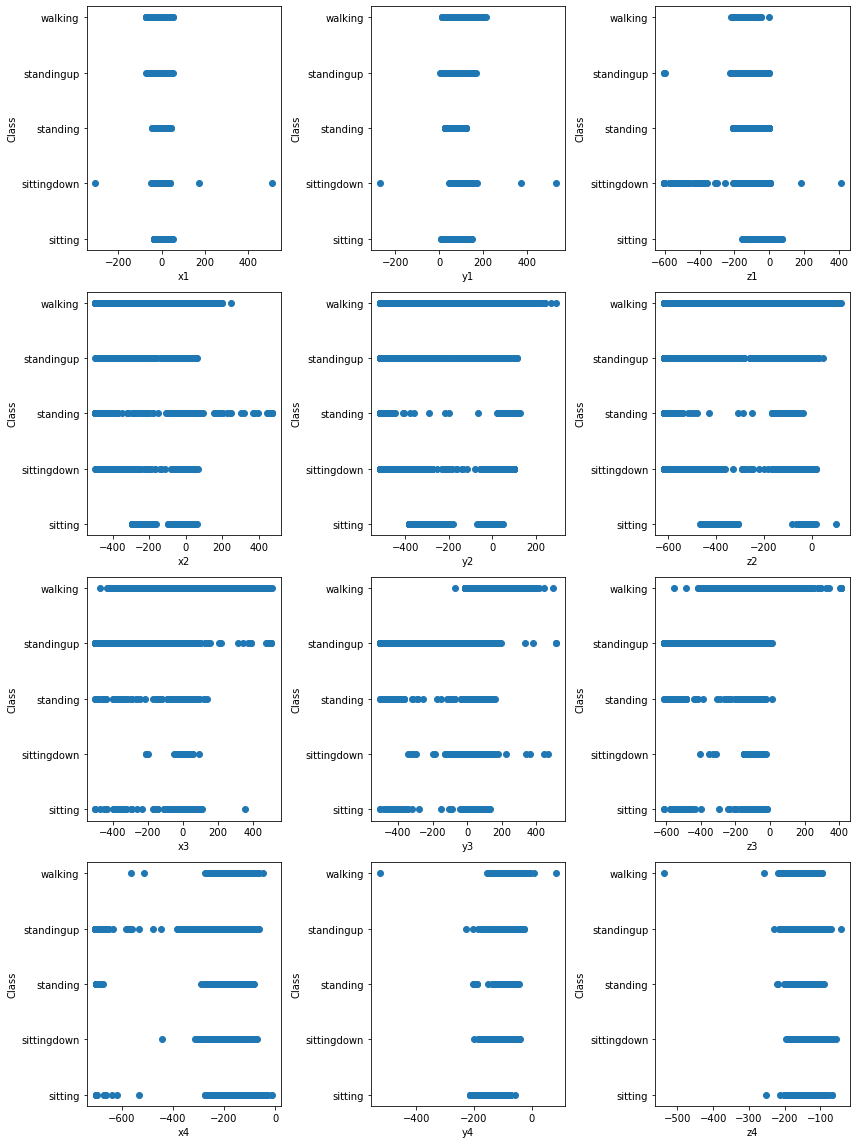

In [2]:
#Create the first visualization based on accelerometer values and classes
fig = plt.figure(figsize=(12,16))
plt.clf() # Clear previous plt figure
            
for i in range(6,18):
    plt.subplot(4, 3, i-5) # Selects which subplot to plot to
    plt.plot(df.iloc[:, i], df.iloc[:,-1], 'o') # Plots a given column
    plt.xlabel(df.columns.values[i]) # Sets Y label
    plt.ylabel("Class")
fig.tight_layout()

 ### Preliminary Observation (2)
In this visualization, I used histograms to show readings the three axes readings from each sensors for each movement/posture. Ideally, this may show some groupings that are common predominantly for individual movements/postures per sensor. 

Observations:
1. With x1, the sensor does not produce much variation away from 0. 
2. Walking may potentially be identified with x2, z2, and y2 grouped together as all largely negative numbers (<-400).
3. x4, y4, and z4 appear to be very commonly all have readings between -200 and -100 when sitting. 

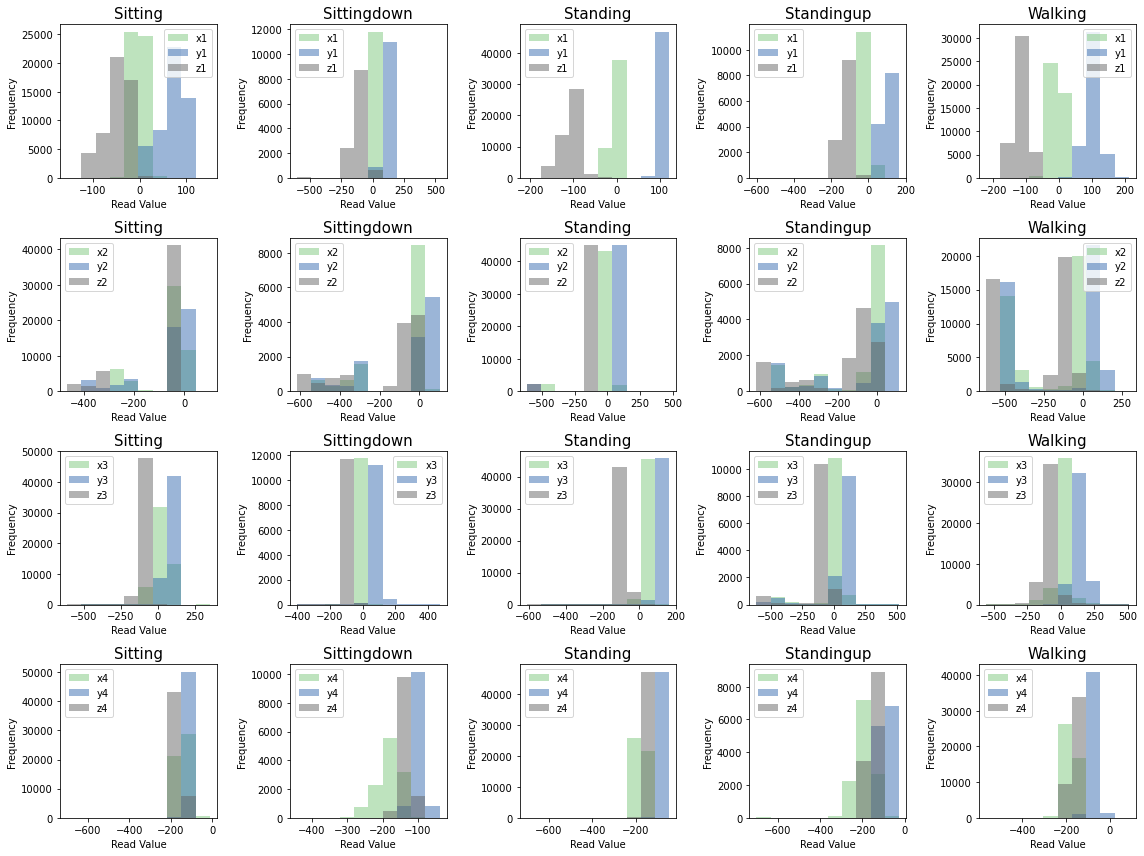

In [3]:
#Visualization using histogram to display groupings of all sensors based on class
fig, axes = plt.subplots(nrows=4, ncols=5)
fig.set_figheight(12)
fig.set_figwidth(16)

for i,c in enumerate(df['class'].unique()): #loop through each class
    for j in range(4): #Loop through each sensor
        df[df['class']==c].iloc[:,(j*3+6):(j*3+9)].plot(kind='hist', ax=axes[int(j),i%5], alpha=0.50, colormap='Accent')
        axes[j, i%5].set_title(c.title())
        axes[j, i%5].set_xlabel('Read Value')
        axes[j, i%5].title.set_fontsize(15)
fig.tight_layout()

### Data - Preprocessing of the data

For preprocessing, I already completed some in the initial data load above under the "Data - Description" section in the form of checking for nulls, and NAs, and subsequently removing those from the data. However, here I complete the preprocessing for the application of ML algorithms. 

1. Encode classes to numerical values. This is needed for the ML algorithms to work with the data. In this step, I also turn the model into a binary classification problem by looking at the problem as "standing" or "not standing" instead of standing, walking, standing up, sitting down, and sitting. 
2. I balanced the dataset based on the classification of standing or not standing. Not standing was much more frequent in the data, which originally caused larger error rates in my initial tests, so I balance the sampling to match the occurrence rate of standing.
3. I split the data set into a training and testing set for the ML algorithms based on a 80/20 split using sklearn's split method. Before splitting the data into training and testing, I break the dataset down to about 25% of its original dataset size, which left 23,685 data samples. This was done as the original dataset was very large and caused significant slowdown of trainings. Reducing data set size did not significantly impact models' metrics.
4. I used the sklearn StandardScalar method to standardize the data based on the training data. Using the scalar fit to the training data, the standardization method is applied to the test data to prepare for future use.
5. The features and target values were split to allow for easier processing with algorithms. 

Lastly, the toy data used for testing is prepared. This is created to validate the ML algorithm / models before usage on the accelerometer datasets.

In [4]:
#Converting classes to binary: walking or not walking
df.loc[df['class'] != 'standing', 'class'] = -1
df.loc[df['class'] == 'standing', 'class'] = 1

pd.DataFrame(df['class']).describe()

,class
count,165632
unique,2
top,-1
freq,118262


In [5]:
from sklearn.utils import resample

#Balance the sampling of the standing and not standing

N = df[df["class"]==1].count()['class']
df_majority = df[df['class']==-1]
df_minority = df[df['class']==1]

df_maj_downsampled = resample(df_majority, replace=False, n_samples=N, random_state=42)

df = pd.concat([df_maj_downsampled, df_minority])

pd.DataFrame(df['class']).describe()

,class
count,94740
unique,2
top,-1
freq,47370


In [6]:
#split dataset for training and testing
from sklearn.model_selection import train_test_split

#Use smaller dataset for project (25% of original data), stratified to maintain class balance
extra_data, data = train_test_split(df, test_size=0.25, random_state=42, stratify=df.iloc[:,-1])
data = pd.DataFrame(data, columns=df.columns)

#Split training and testing datasets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42,stratify=data.iloc[:,-1])
print("Original Data Shape: " + str(data.shape))
print("Train Data Shape: " + str(train_data.shape))
print("Test Data Shape: " + str(test_data.shape))

Original Data Shape: (23685, 19)
Train Data Shape: (18948, 19)
Test Data Shape: (4737, 19)


In [7]:
#Standardization - only done on training set
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Split features and target values
train_data_X = train_data.iloc[:,6:-1] #Not formatted to numpy as it will be done after standardization
train_data_T = train_data.iloc[:,-1].to_numpy() #Utilizing numpy formats

#standardize feature values
scaler = StandardScaler()
scaler.fit(train_data_X)
train_data_Xs = scaler.transform(train_data_X)
pd.DataFrame(train_data_Xs, columns = train_data_X.columns).describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04,1.894800e+04
mean,-1.141688e-17,-2.537581e-16,1.116302e-16,6.410091e-18,-6.643328e-17,-5.750332e-17,-1.303580e-16,2.533568e-16,6.393685e-17,3.681759e-16,-3.611447e-16,8.652568e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-5.292741e+00,-3.950923e+00,-1.291217e+01,-2.710674e+00,-2.586802e+00,-2.614909e+00,-1.163869e+01,-1.331256e+01,-1.347208e+01,-1.571559e+01,-6.700903e+00,-4.106533e+00
25%,-4.425713e-01,-1.125093e-01,-6.454178e-01,2.853645e-01,3.281626e-02,1.831210e-01,-1.585452e-01,-1.494436e-01,-2.559747e-01,-6.005472e-01,-5.169684e-01,-5.282317e-01
50%,6.265463e-02,1.790158e-01,-1.781678e-02,4.059678e-01,4.859112e-01,2.526373e-01,8.858128e-02,2.461408e-02,8.024725e-02,-6.707505e-02,8.500757e-02,-1.704582e-02
75%,5.678806e-01,4.705409e-01,3.245111e-01,4.630956e-01,5.640311e-01,4.785652e-01,2.907757e-01,3.292151e-01,2.871530e-01,3.774850e-01,6.869835e-01,4.089424e-01
max,5.620140e+00,4.649067e+00,4.232754e+00,3.414701e+00,1.360853e+00,1.434414e+00,9.254726e+00,5.550947e+00,8.692701e+00,3.933966e+00,4.025214e+00,6.202383e+00


In [8]:
#Prepare test data

#Split features and target values
test_data_X = test_data.iloc[:,6:-1]
test_data_T = test_data.iloc[:,-1].to_numpy()

#standardize feature readings
test_data_Xs = scaler.transform(test_data_X)
pd.DataFrame(test_data_Xs, columns = test_data_X.columns).describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000
mean,0.005423,-0.010493,0.016112,-0.020365,-0.021123,-0.017688,0.007562,-0.030838,-0.014443,-0.007625,-0.003763,-0.029834
std,1.009397,1.001862,0.988783,1.012683,1.014964,1.013711,1.074002,1.116810,1.118543,1.097897,0.979684,1.003324
min,-5.696921,-3.853748,-3.041713,-2.710674,-2.586802,-2.614909,-11.638693,-13.312558,-13.472082,-15.745228,-6.591453,-3.595347
25%,-0.442571,-0.112509,-0.645418,0.279017,0.022400,0.177328,-0.136079,-0.171201,-0.255975,-0.600547,-0.516968,-0.528232
50%,0.062655,0.179016,-0.017817,0.405968,0.485911,0.252637,0.088581,0.024614,0.080247,-0.067075,0.085008,-0.017046
75%,0.567881,0.519128,0.353038,0.463096,0.558823,0.461186,0.313242,0.307458,0.287153,0.377485,0.632258,0.408942
max,4.609688,3.774492,3.120188,1.719908,1.121286,1.173728,10.153368,5.616218,12.985996,3.074483,3.970489,5.009616


In [9]:
#Generate toy data
mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

X = np.vstack((C1, C2))
T = np.ones(100)
T[:50] *= -1

# Train and Test data
N1 = C1.shape[0]
N2 = C2.shape[0]
N = N1 + N2

Xtrain = np.vstack((C1, C2))
Ttrain = np.ones(100)
Ttrain[:N1] *= -1

# III. Method

### Support Methods

The below code is for support functions to be utilized in evaluations. The confusion_matrix function is to calculate and return a dataframe confusion matrix based on given results. roc_pr is utilized to calculate the needed values to graph ROC and PR curves, namely the false positive rates, true positive rates, precisions, and recalls (based on thresholds). The graph method is to be generate performance graphs based on the output results. It generates 4 graphs, the ROC curve, PR curve, a histogram that displays the prediction values based on the predicted classes, and a histogram that displays prediction values based on the TRUE classes.

In [10]:
import math
from sklearn.metrics import matthews_corrcoef

def confusion_matrix(Y, T):
    """
    Keyword arguments:
        Y    ndarray - predicted labels
        T    ndarray - target labels
            
    Return
        @cfm DataFrame - confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Prediction and target array lengths must match")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    targets_count = [T == c for c in classes]
    for c in classes:
        predicted_counts = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(predicted_counts, targets_count)) for targets_count in targets_count]
    
    cfm.rename(columns={-1: 'Actual -1', 1: 'Actual 1'}, inplace=True)
    cfm.rename(index={-1: 'Predicted -1', 1: 'Predicted 1'}, inplace=True)
    
    return cfm

def roc_pr(Y, T):
    """
    Keyword arguments:
        Y    ndarray - predicted labels
        T    ndarray - target labels
        
    Returns
        fprs    ndarry - false positive rates
        tprs    ndarry - true positive rates
        pres    ndarry - precision values
        recs    ndarry - recall values
    """
    fprs = [] 
    tprs = []
    pres = []
    recs = []

    for thres in sorted(Y)[::-1]:
        n_TP = np.logical_and( Y >= thres, T == 1).sum() #true positive
        n_FP = np.logical_and( Y >= thres, T == -1).sum() #false positive
        n_TN = np.logical_and( Y < thres, T == -1).sum() #true negative
        n_FN = np.logical_and( Y < thres, T == 1).sum() #false negative

        fpr = n_FP / (n_FP + n_TN) 
        tpr = n_TP / (n_TP + n_FN) 
        fprs.append(fpr)
        tprs.append(tpr)
        precision = n_TP / (n_TP + n_FP) 
        recall = n_TP / (n_TP + n_FN)
        pres.append(precision)
        recs.append(recall)
    
    return fprs, tprs, recs, pres
    
def graph(recs, pres, fprs, tprs, Y_prob, Y, T):
    """
    Keyword arguments:
        recs    ndarry - recall values
        pres    ndarry - precision values
        fprs    ndarry - false positive rates
        tprs    ndarry - true positive rates
        Y_prob    ndarry - prediction probabilities
        Y    ndarray - predicted labels
        T    ndarray - target labels
        
    Prints
        ROC Curve -  
        PR Curve - 
        Histogram of prediction values based on predicted classes
        Histogram of prediction values based on the TRUE / target classes
    """
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_figheight(16)
    fig.set_figwidth(20)
    
    ax[0,0].plot(fprs, tprs)
    ax[0,0].set_xlabel("P(FP)")
    ax[0,0].set_ylabel("P(TP)")
    ax[0,0].set_title("ROC Curve")
    
    ax[0,1].plot(recs, pres)
    ax[0,1].set_xlabel("Recall)")
    ax[0,1].set_ylabel("Precesion")
    ax[0,1].set_title("PR Curve")

    #Visualization using histogram to display groupings predictions
    ax[1,0].hist(Y_prob[Y==(-1)], alpha=0.50, label="Not Standing", bins=20)
    ax[1,0].hist(Y_prob[Y==(1)], alpha=0.50, label="Standing",bins=20)
    ax[1,0].set_xlabel('Prediction Value')
    ax[1,0].set_ylabel('Frequency')
    ax[1,0].legend()
    ax[1,0].set_title("Prediction Distribution")
    
    #Visualization using histogram to display groupings predictions
    ax[1,1].hist(Y_prob[T==(-1)], alpha=0.50, label="True Not Standing",bins=20)
    ax[1,1].hist(Y_prob[T==(1)], alpha=0.50, label="True Standing",bins=20)
    ax[1,1].set_xlabel('Prediction Value')
    ax[1,1].set_ylabel('Frequency')
    ax[1,1].legend()
    ax[1,1].set_title("Prediction Values and True Labels")

    plt.rcParams.update({'font.size': 20})
    
    fig.tight_layout()
    
def calc_metrics(Y, T):
    """
    Keyword arguments:
        Y    ndarray - predicted labels
        T    ndarray - target labels
        
    Returns
        metric_scores    ndarry - classification performance metrics
            Precision - Proportion of true predictions that are correct
            Recall - Proportion of actual true labels identifed correctly
            Specificity - True Negative Rate / Proportion of false predictions that are correct
            F1 - Metric balancing precision and recall values
            MCC - Matthews Correlation Coefficient : Balanced measure utilizing both true / false positives / negatives
    """
    metric_scores = dict()
    tp = np.logical_and( Y == 1, T == 1).sum()
    tn = np.logical_and( Y == -1, T == -1).sum()
    fp = np.logical_and( Y == 1, T == -1).sum()
    fn = np.logical_and( Y == -1, T == 1).sum()
    
    metric_scores['Precision'] = tp / (tp + fp)
    metric_scores['Recall'] = tp / (tp + fn)
    metric_scores['Specificity'] = tn / (tn + fp)
    metric_scores['F1'] = tp / (tp + (fn + fp)/2)
    metric_scores['MCC'] = matthews_corrcoef(T.astype('int16'), Y) 
    #sklearn was used for MCC due to issues with overflow in manual calculations
    
    return metric_scores

### A. Super Classs Definition

The BaseModel and ClassifierModel take on the basic portions of explaining the models used in the classification algorithms. In the BaseModel, it is designed as every model will need two essential steps: a training and the use of the trained model. The ClassifierModel expands upon that to give support functions that help with different algorithms. 

The check_matrix function is present to enforce shape requirements, and the add_ones function is given to be able to add a bias column to inputs. The bias is included in some classification algorithms, and it is needed to be able to calculate a bias weight.

In [11]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

class ClassifierModel(BaseModel):
    """
        Abstract class for classification models
    """

    def _check_matrix(self, mat, name):
        """
            validate matrix size to be 2d to ensure bias column can be added
            
            Keyword arguments:
                mat    ndarry - matrix to be checked
                name    string - name of matric
        """
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    def add_ones(self, X):
        """
            add a bias column to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

#### Summary of Pocket Algorithm
The Pocket algorithm is a variation ontop of the Perceptron algorithm. A Perceptron is a linear model that is used for classification. It works through the use of a weight function that is applied to the features of an input to output a probability. In a binary classification, the probability is then translated to a class based on whether the probability is below 0 (the negative class) or above 0 (the positive class). The weight function is determined by iterating over training samples and updating the weights based on the true classification. However, this weight deterimination can be unstable, especially as we get closer to the best weight vector. 

The Pocket algorithm added on to the perceptron by adding a "pocket" for the weight, where the best weight seen so far is saved. The use of this pocket allows us to keep the best results seen instead of possibly ending on a more erroneous weight due to the more unstable regular perceptron method.

#### Explanation of Code
The train method is used to determine the weight vector that the pocket algorithm will use. It will take an input to train on, an alpha to use for the learning rate, and a maxiter to dictate how many loops of the training set will be used. It will the input and add a bias column with the add_ones function. With this input, it will then loop repeatedly through the training set based on the maxiter given. Each maxiter loop will have an additional loop through a random permutation of the input to predict the classification, and if the classification is wrong, it will update the weight based on the input and our given alpha (the target value is included to use the appropriate sign). It will then compare this new weight vector to the one in the pocket, and if the new weight vector is better, it will replace the pocket vector. After it loops through the training set, if all samples were correctly classified, it will break out of the maxiter loop, as it has converged and does not need further training.

After the model is trained, the use function will take an input, add a bias column, and then get the dot product of the input and the pocket weight vector (the best weight vector found). This probability vector will then be used to determine which binary classification each input is given based on whether the value is negative or positive. Both the probability, and the final class will be returned. 

#### Testing toy data
Toy data is used to test the design of the algorithm. Toy data that had been generated earlier is used to train the model and generate a boundary line. Based on the output graph that appears as expected, the design seems appropriate.

In [12]:
from copy import deepcopy as copy 

class Pocket(ClassifierModel):
    """
        Pocket class to act as the ML model for binary classification using the pocket learning algorithm
        
        Attributes
        ==========
        alpha    float - learning rate
        maxiter    int - # of training iterations
        w    ndarray - weights vector to be trained
        w_pocket    ndarry - pocket for best performing weights vector
    """
    def __init__(self, alpha=0.1, maxiter=10000):
        """
            Pocket class constructor
            
            Keyword arguments:
                alpha    float - learning rate (default 0.1)
                maxiter    int - # of training iterations (default: 10000)
        """
        ClassifierModel.__init__(self)
        self.alpha = alpha
        self.maxiter = maxiter
        self.w = None
        self.w_pocket = None
        
    def compare(self, X, T, w, wp):
        """
            Compare new weight vector with pocketed weight vector. 
            
            Keyword arguments:
                X    ndarray - data features
                T    ndarray - target labels
                w    ndarray - weights vector to be trained
                w_pocket    ndarry - pocket for best performing weights vector
                
            Return:
                int: 1 if w is better -1 if wp is better
        """
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        """
            train() utilizes the intialized alpha and maxiter with the given data (data 
            features X and data target labels T) to create the weight vector utilized in 
            the model. The bias column is added, then training is looped based until the model
            converges or reaches the maxiter limit. Each maxiter loop will have an additional loop 
            through a random permutation of the input to predict the classification and update the 
            weights based on the alpha and error. The new weight vector is then compared to the pocket,
            and the more accurate vector is kept.
            
            Keyword arguments:
                X    ndarray - data features
                T    ndarray - target labels
        """
        N = X.shape[0]
        X1 = super().add_ones(X)
        self.w = np.zeros(X1.shape[1])
        self.w_pocket = copy(self.w)

        for i in range(self.maxiter):
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w = self.w + self.alpha * T[k] * X1[k]
                    converged = False
                    
                    ##### compare pocket weights
                    if self.compare(X1, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]

            if converged:
                break
    
    def use(self, X):
        """
            use() takes given data features to use with trained model to calculate and return 
            the prediction values and target labels.
            
            Keyword arguments:
                X    ndarray - data features
                
            Returns:
                Y    ndarry - class prediction values [-1, 1]
                sign_class    ndarry - predicted target labels of -1 or 1
        """
        X1 = super().add_ones(X)
        Y = X1 @ self.w_pocket
        sign_class = np.sign(Y)
        
        return Y, sign_class

#### Toy Test

(-3.0, 7.0)

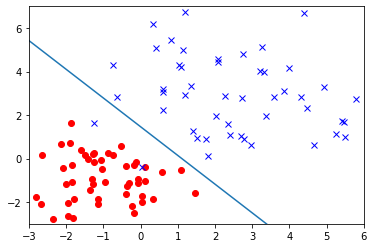

In [13]:
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

pocket_toy = Pocket()
pocket_toy.train(Xtrain,Ttrain)

xt = np.array([-3, 5])
yt = -pocket_toy.w[1] * xt / pocket_toy.w[2] - pocket_toy.w[0] / pocket_toy.w[2]

plt.plot(xt, yt)
plt.xlim([-3, 6])
plt.ylim([-3, 7])

### C. QDA
#### Summary of QDA Algorithm
Quadratic Discriminant Analysis (QDA) is a classifier that functions on a quadratic decision surface. It has a closed-form solution that is used for classifying that operates on top of the bayes rule for classification. QDA is derived from bayes probabilistic models that are calculated based on the distribution of feature values for each class used in the classification. To classify data, QDA uses a discriminant function to calculate a discriminant value for each class based on the input, and it assigns a class based on whichever discriminant value is greater. The discriminant function is trained based on the training input to calculate the mu (average of each feature), sigma (covariance matrix), and probability of a class in a dataset (P(T=k)) for each class. Once the mu, sigma, and P(T=K) is calculated for each class (K), it simply uses these values for new input data to calculate each classes discriminant values. 

#### Explanation of Code
Each instance of the QDA classifier will have a mu, sigma, and prior for each class. In this case, the class is designed only for binary classification, so there are two of each. The train function will take input of a training dataset and the target values, and it will use this to calculate the mean, covariance matrix, and probability of the class within the dataset for both the -1 class and +1 class. Once the model is trained, the use function can be called to predict a new target value. The use function utilizes the QDA_calculate function to use the discriminant function for each class, and gets back the discriminant values for each class. These discriminant values are then tested for the maximum value, and classes are assigned based on the highest discriminant value. The probability of both classes are also calculated based on the discriminant values. The use function returns the probability of each class, the class assigned, and both discriminant value arrays. 

#### Testing toy data
Toy data is used to test the performance of the algorithm to ensure there are no major errors in its design. Using the toy data, the model is trained and used on test data to display the quadratic decision surfaces for the data. Based on the output, the functions appear to be working correctly to generate a quadratic boundary.

In [14]:
class QDA(ClassifierModel):
    """
        QDA class to act as the ML model for binary classification using the QDA closed-form solution
        
        Attributes
        ==========
        mu1    ndarry - average feature values for class 1
        mu2    ndarray - average feature values for class 2
        sigma1    ndarray - covariance matrix for class 1
        sigma2    ndarray - covariance matrix for class 2
        prior1    ndarray - prior probability of class 1 (proportion of its occurrence compared with the other target class)
        prior2    ndarray - prior probability of class 2 (proportion of its occurrence compared with the other target class)
    """
    def __init__(self):
        ClassifierModel.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.sigma1 = None
        self.sigma2 = None
        self.prior1 = None
        self.prior2 = None
    
    def train(self, X, T):
        """
            train() utilizes the given features and targets to calculate the mu, sigma, and prior for both classes
            
            Keyword arguments:
                X    ndarray - data features
                T    ndarray - target labels
        """
        X1s = X
        
        self.mu1 = np.mean(X1s[(T==-1)], 0) 
        self.mu2 = np.mean(X1s[(T==1)], 0)

        self.sigma1 = np.cov(X1s[(T==-1)].T)
        self.sigma2 = np.cov(X1s[(T==1)].T)
        
        N1 = T[T==-1].shape[0]
        N2 = T[T==1].shape[0]
        N = N1+N2

        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
    def QDA_calculate(self, X):
        """
            QDA_calculate utilizes the previously calculates mu, sigma, and prior values to calculate the 
            discriminant values for each class.
        
            Keyword arguments:
                X    ndarray - data features
                
            Return:
                d1    ndarray - discriminant values for class 1 from given X matrix features
                d2    ndarray - discriminant values for class 2 from given X matrix features
        """
        sigma_inv1 = np.linalg.pinv(self.sigma1)
        diffv1 = X - self.mu1
        det_sigma1 = (np.linalg.det(self.sigma1))
        if det_sigma1 == 0:
            print("det 1 is 0")
            det_sigma1 = 1
        d1 = -0.5  * np.log(det_sigma1) \
                - 0.5 * np.sum(diffv1 @ sigma_inv1 * diffv1, axis=1) \
                + np.log(self.prior1)
        
        sigma_inv2 = np.linalg.pinv(self.sigma2)
        diffv2 = X - self.mu2
        det_sigma2 = (np.linalg.det(self.sigma2))
        if det_sigma2 == 0:
            print("det 2 is 0")
            det_sigma2 = 1
        d2 = -0.5  * np.log(det_sigma2) \
                - 0.5 * np.sum(diffv2 @ sigma_inv2 * diffv2, axis=1) \
                + np.log(self.prior2) 
        return d1, d2

    def use(self, X):
        """
            use() takes given data features and calls QDA_calculate to get discriminant values for each class. 
            Discriminant values are then used to determine class probabilities and predicted class labels.
            
            Keyword arguments:
                X    ndarray - data features
                
            Returns:
                probs    ndarry - class prediction values / probabilities
                sign    ndarry - predicted target labels of -1 or 1
                d1    ndarray - discriminant values for class 1 from given X matrix features
                d2    ndarray - discriminant values for class 2 from given X matrix features
        """
        X1s = X
        d1, d2 = self.QDA_calculate(X1s)
        disc = np.stack((d1,d2), axis=1)
        sign = np.argmax(disc, axis=1)
        sign[sign == 0] = -1
        
        prob1 = np.exp( d1 - 0.5*X1s.shape[1]*np.log(2*np.pi) - np.log(self.prior1))
        prob2 = np.exp( d2 - 0.5*X1s.shape[1]*np.log(2*np.pi) - np.log(self.prior2))
        probs = np.stack((prob1,prob2), axis=1)       

        return probs, sign, d1, d2

Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

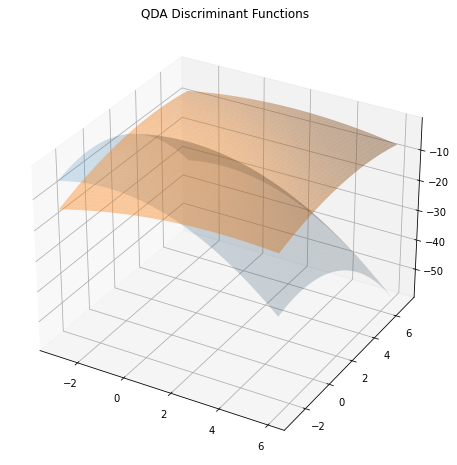

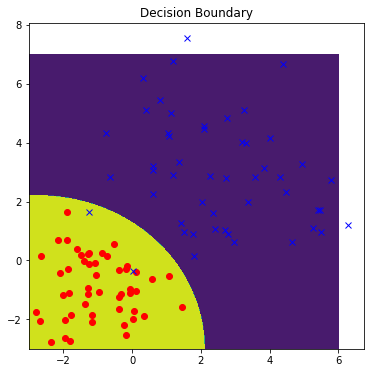

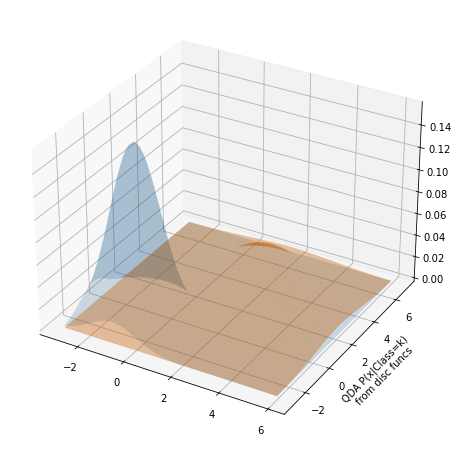

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#train
qda_toy = QDA()
qda_toy.train(Xtrain,Ttrain)

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))
Xtest = np.vstack((xs.flat, ys.flat)).T

#compute the discriminant function on test data
probs, sign, d1, d2 = qda_toy.use(Xtest)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')


#Plot generative distributions p(x | Class=k) starting with discriminant functions
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(qda_toy.prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(qda_toy.prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### D. LDA

#### Summary of LDA Algorithm
Linear Discriminant Analysis (LDA) is a classifier that functions on a linear decision surface. It has a closed-form solution that is used for classifying that operates on top of the bayes rule for classification. LDA is derived from bayes probabilistic models that are calculated based on the distribution of feature values for each class used in the classification. However, LDA is a specific version of QDA where it is assumed that each class can share the same covariance matrix for feature values. 

To classify data, LDA uses a discriminant function to calculate a discriminant value for each class based on the input, and it assigns a class based on whichever discriminant value is greater. The discriminant function is trained based on the training input to calculate the mu (average of each feature) and probability of a class in a dataset (P(T=k)) for each class, and the sigma (covariance matrix) is calculated for the entire dataset. Once the mu and P(T=K) is calculated for each class (K) and the sigma is calculated for the whole dataset, it simply uses these values for new input data to calculate each classes discriminant values. 

#### Explanation of Code
Each instance of the LDA classifier will have a mu and prior for each class and a sigma that is shared for both classes. In this case, the class is designed only for binary classification, so there are two values for mu and prior and one value for sigma. The train function will take input of a training dataset and the target values, and it will use this to calculate the mean and probability of the class within the dataset for both the -1 class and +1 class and the covariance matrix for the whole dataset. Once the model is trained, the use function can be called to predict a new target value. The use function utilizes the LDA_calculate function to use the discriminant function for each class, and gets back the discriminant values for each class. These discriminant values are then tested for the maximum value, and classes are assigned based on the highest discriminant value. The probability of both classes are also calculated based on the discriminant values. The use function returns the probability of each class, the class assigned, and both discriminant value arrays. 

#### Testing toy data
Toy data is used to test the performance of the algorithm to ensure there are no major errors in its design. Using the toy data, the model is trained and used on test data to display the linear decision surfaces for the data. Based on the output, the functions appear to be working correctly to generate a linear boundary and seem appropriate.

In [16]:
class LDA(ClassifierModel):
    """
        LDA class to act as the ML model for binary classification using the LDA closed-form solution
        
        Attributes
        ==========
        mu1    ndarry - average feature values for class 1
        mu2    ndarray - average feature values for class 2
        sigma    ndarray - covariance matrix for entire dataset
        prior1    ndarray - prior probability of class 1 (proportion of its occurrence compared with the other target class)
        prior2    ndarray - prior probability of class 2 (proportion of its occurrence compared with the other target class)
    """
    def __init__(self):
        ClassifierModel.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.sigma = None
        self.prior1 = None
        self.prior2 = None
    
    def train(self, X, T):
        """
            train() utilizes the given features and targets to calculate the mu, sigma, and prior for both classes
            
            Keyword arguments:
                X    ndarray - data features
                T    ndarray - target labels
        """
        X1s = X
        
        self.mu1 = np.mean(X1s[T==-1], 0)
        self.mu2 = np.mean(X1s[T==1], 0)

        self.sigma = np.cov(X1s.T)
        
        N1 = T[T==-1].shape[0]
        N2 = T[T==1].shape[0]
        N = N1+N2

        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
    def LDA_calculate(self, X):
        """
            LDA_calculate utilizes the previously calculates mu, sigma, and prior values to calculate the 
            discriminant values for each class.
        
            Keyword arguments:
                X    ndarray - data features
                
            Return:
                d1    ndarray - discriminant values for class 1 from given X matrix features
                d2    ndarray - discriminant values for class 2 from given X matrix features
        """
        sigma_inv = np.linalg.pinv(self.sigma)
        
        d1 = np.sum((X @ sigma_inv) * self.mu1 \
                - 0.5 * (self.mu1 @ sigma_inv) * self.mu1, axis=1) \
                + np.log(self.prior1)
        
        d2 = np.sum((X @ sigma_inv) * self.mu2 \
                - 0.5 * (self.mu2 @ sigma_inv) * self.mu2, axis=1) \
                + np.log(self.prior2)
        return d1, d2

    def use(self, X):
        """
            use() takes given data features and calls LDA_calculate to get discriminant values for each class. 
            Discriminant values are then used to determine class probabilities and predicted class labels.
            
            Keyword arguments:
                X    ndarray - data features
                
            Returns:
                probs    ndarry - class prediction values / probabilities
                sign    ndarry - predicted target labels of -1 or 1
                d1    ndarray - discriminant values for class 1 from given X matrix features
                d2    ndarray - discriminant values for class 2 from given X matrix features
        """
        X1s = X
        d1, d2 = self.LDA_calculate(X1s)

        
        prob1 = np.exp( d1 - 0.5*X1s.shape[1]*np.log(2*np.pi) - np.log(self.prior1))
        prob2 = np.exp( d2 - 0.5*X1s.shape[1]*np.log(2*np.pi) - np.log(self.prior2))
        probs = np.stack((prob1,prob2), axis=1)
        
        sign =  np.argmax(probs, axis=1)
        sign[sign == 0] = -1
        
        return probs, sign, d1, d2

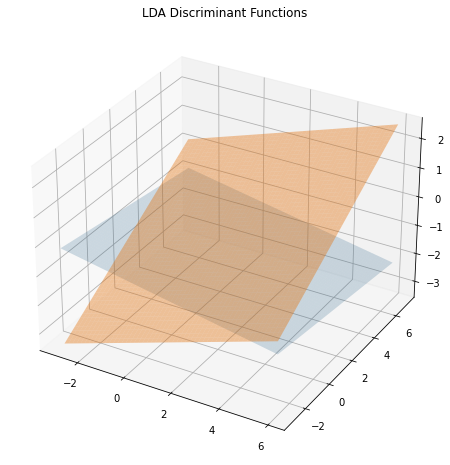

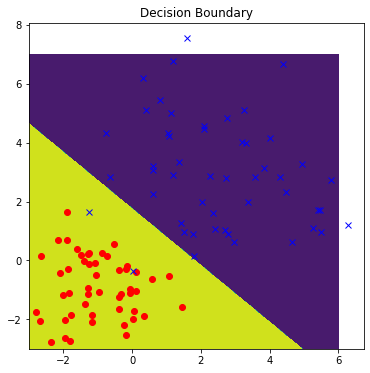

In [17]:
lda_toy = LDA()
lda_toy.train(Xtrain,Ttrain)
probs, sign, d1, d2 = lda_toy.use(Xtest)

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

### E. Logistic Regression

#### Summary of Logistic Regression
Logistic regression is similar to the least squares algorithm. At its essence, it uses trained weights based on each feature to calculate the probability of each target class for an input. However, the weights are no longer a simple vector, but a matrix that contains a column of weights for each target class. The weights are trained by looping through the training set and adjusting the weights matrix based on the learning rate (alpha) and the errors between the true target values and the predicted target probabilities for each class (aka gradient). The probabilities of each class for an input are calculated using a softmax function that generalizes the logistic sigmoid function and outputs the probability of each class.

After the model is trained, the softmax function is used on new input to predict the probability of each class. All probabilities ouput are positive, and the class is assigned based on the maximum probability.

#### Explanation of Code
The LogisticRegression class is designed with the general train and use functions, as well as a g function and the softmax function. The softmax function is used to calculate the probabilities of each class based on the given dot product of the input and weight matrix. The g function calculates the gradient by calculating the dot product of the input and weight matrix and then uses the softmax function. The train function takes an input dataset, target values, alpha, and niter to train the weight matrix. The alpha is used to adjust the learning rate and the niter is used to adjust how many loops of the training set will be used in adjusting the weights. With the parameters set, the function takes the input and adds a bias column, and then uses the number of features from the training set and the number of classes in the target values to create the weight matrix. The target values are adjusted to be compatible with the weight matrix by adjusting the negative and positive class assignments into a one-hot encoding assignment. The algorithm then loops based on the niter given to repeatedly calculate the predicted probabilities (using the g function and softmax function), and then adjust the weight matrix based on the alpha and the gradient found. The use function is utilized after training to predict the probabilities of each class based on an input. The function uses the g function and softmax function to get the probability of each class for each input data sample, and then it uses the probabilities to determine the classification based on whichever class probability is highest.

#### Testing toy data
The toy data is used to test the correct performance of the algorithm. To quickly determine whether the algorithm is designed correctly, a model is trained on the toy data and then test data is run to generate a boundary graph. Based on the output, the boundary graph appears to produce correct results to classify the data.

In [18]:
class LogisticRegression(ClassifierModel):
    """
        LogisticRegression class to act as the ML model for binary classification. 
        
        Attributes
        ==========
        w    ndarry - weights vector to be trained
    """
    
    def __init__(self):
        """
            Pocket class constructor
        """
        ClassifierModel.__init__(self)
        self.w = None
        
    def softmax(self, z):
        """
            softmax function that generalizes the logistic sigmoid function and outputs the probability of each class
            
            Keyword arguments:
                z    ndarray - dot product of data features and current weights
                
            Returns:
                ndarry - probabilties of each class for each data point given
        """
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
        
    def g(self, X, w):
        """
            gradient function used to get predicted probabilities
            
            Keyword arguments:
                X    ndarray - data features with bias column added
                w    ndarry - weights vector to be trained
                
            Returns:
                ndarry - probabilties of each class for each data point given
        """
        return self.softmax(X @ w) 
    
    def train(self, X, T, K=2, alpha=0.001, niter=1000):
        """
            train() utilizes the intialized alpha and niter with the given data (data 
            features X and data target labels T) to create the weight vector utilized in 
            the model. The bias column is added, then training is looped based until the model
            converges or reaches the niter limit. 
            
            Keyword arguments:
                X    ndarray - data features
                T    ndarray - target labels
                K    int - # of classes (default 2)
                alpha    float - learning rate (default 0.001)
                niter    int - # of training iterations (default: 10000)
        """
        X1 = super().add_ones(X)
        D = X1.shape[1]
        self.w = np.random.rand(D, K)
        T2 = np.empty([T.shape[0], K])
        T2[T==-1] = [1,0]
        T2[T==1] = [0,1]
        
        for step in range(niter):
            ys = self.g(X1, self.w)
            self.w += alpha * X1.T @ (T2 - ys)
    
    def use(self, X):
        """
            use() takes given data features to use with trained model to calculate and return 
            the prediction values and target labels.
            
            Keyword arguments:
                X    ndarray - data features
                
            Returns:
                Y    ndarry - class prediction values [-1, 1]
                Y_sign    ndarry - predicted target labels of -1 or 1
        """
        X1 = super().add_ones(X)
        Y = self.g(X1, self.w)
        
        Y_sign = np.argmax(Y, 1)
        Y_sign[Y_sign==0] = -1
        
        return Y, Y_sign

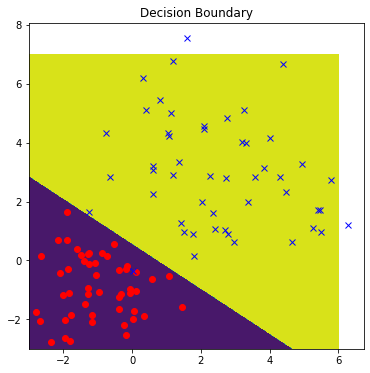

In [19]:
lr_toy = LogisticRegression()
lr_toy.train(Xtrain,Ttrain)
probs, sign = lr_toy.use(Xtest)

x = np.linspace(-3, 6, 500)
y = np.linspace(-3, 7, 500)

xs, ys = np.meshgrid(x, y)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, sign.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

# IV. Experiments

## Discussion about evaluation metrics
Confusion Matrix: The confusion matrix is used to quickly view overall classification results. The confusion matrix allows us to view the true target values (the column headers) versus the predicted classifications (the row headers). This easily shows us our true negatives, true positives, false negatives, and false positives, which will be further used in other evaluation metrics.

Precision: Precision is used to calculate the accuracy of the model's positive predictions. It is essentially the ratio of positive predictions that are correct. It is calculated as $$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

Recall: Recall is used to calculate the true positive rate, and it could also be called the sensitivity. This metric will essentially show you how well a model's predictions covers the true positive values. It is calculated as $$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

Specificity: Specifity is used to look at the true negative rate. It is similar to recall, but instead it shows us how well a model's predictions covers the true negative classes. Specificity is calculated as $$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$


F1 score: The F1 score is a harmonic mean of the precision and recall values, which allows us to consider one overall metric in place of both recall and precision. F1 is calculated as $$
\begin{align*}
F_1 &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$


MCC(Matthews Correlation Coefficient): MCC is an evaluation metric that uses all counts from a confusion matrix, and it could be regarded as a balance measure of the entire set. MCC is calculated as $$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$


ROC(Receiver Operating Characteristic) Curve: The ROC curve is used for binary classification to plot the recall vs the false positive rate based on thresholds. An optimum ROC curve should have its curve close to the top left. ROC curve is often also given as the AUC, or area under the curve. The AUC measures the area under the curve of the ROC, and the closer to 1 the AUC is, the better the performance.


PR Curve: The PR curve is a graph of the precision vs the recall based on thresholds in the predictions. This graph can be used to show the trade-off of precision versus recall, and it is preferred in cases where the positive class is uncommon or when false positives are more important than false negatives.


## Plots / Results

As this is a classification problem and each algorithm could produce a prediction strength value, I graphed the confusion matrix, ROC curve, PR curve, a histogram of the predicted class probabilities grouped by the predicted class and then a separate histogram grouped by the true class label. The ROC curve and PR curve are general evaluations for classifications, but as my classes have been balanced, I am more concerned with the ROC curve. The histogram of predicted probabilities versus based on the predicted and true class labels is used to see what sort of probability distributions are found with the algorithm. This is also used to see if there is any pattern of probabilities assigned for the false negatives and false positives.

### Pocket Plots

#### Pocket Training Data - Time / Confusion Matrix

In [20]:
import time
start_time = time.time()

pocket = Pocket(maxiter = 10)
pocket.train(train_data_Xs,train_data_T)

pocket_train_time = time.time() - start_time

train_Y_probs, train_Y_sign = pocket.use(train_data_Xs)

print("Training Time: ", pocket_train_time)
confusion_matrix(train_Y_sign,train_data_T.reshape(1,-1)[0].tolist())

Training Time:  91.53225207328796


,Actual -1,Actual 1
Predicted -1,7973,612
Predicted 1,1501,8862


#### Pocket Test Data - Confusion Matrix

In [21]:
test_Y_probs, test_Y_sign = pocket.use(test_data_Xs)
confusion_matrix(test_Y_sign,test_data_T.reshape(1,-1)[0].tolist())

,Actual -1,Actual 1
Predicted -1,1996,142
Predicted 1,373,2226


#### Pocket Model Metrics

In [22]:
train_metrics = calc_metrics(train_Y_sign, train_data_T)
test_metrics = calc_metrics(test_Y_sign, test_data_T)

metrics_list = np.array(list(train_metrics.values())).reshape(1,-1)

metrics_df = pd.DataFrame(data=np.array(list(train_metrics.values())).reshape(1,-1), index=["Pocket Train"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df_append = pd.DataFrame(data=np.array(list(test_metrics.values())).reshape(1,-1), index=["Pocket Test"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df = pd.concat([metrics_df, metrics_df_append], axis=0, sort=False)
metrics_df

,Precision,Recall,Specificity,F1,MCC
Pocket Train,0.855158,0.935402,0.841566,0.893482,0.780412
Pocket Test,0.856483,0.940034,0.842550,0.896316,0.786316


#### Pocket Model Test Data -  Metrics Graphs

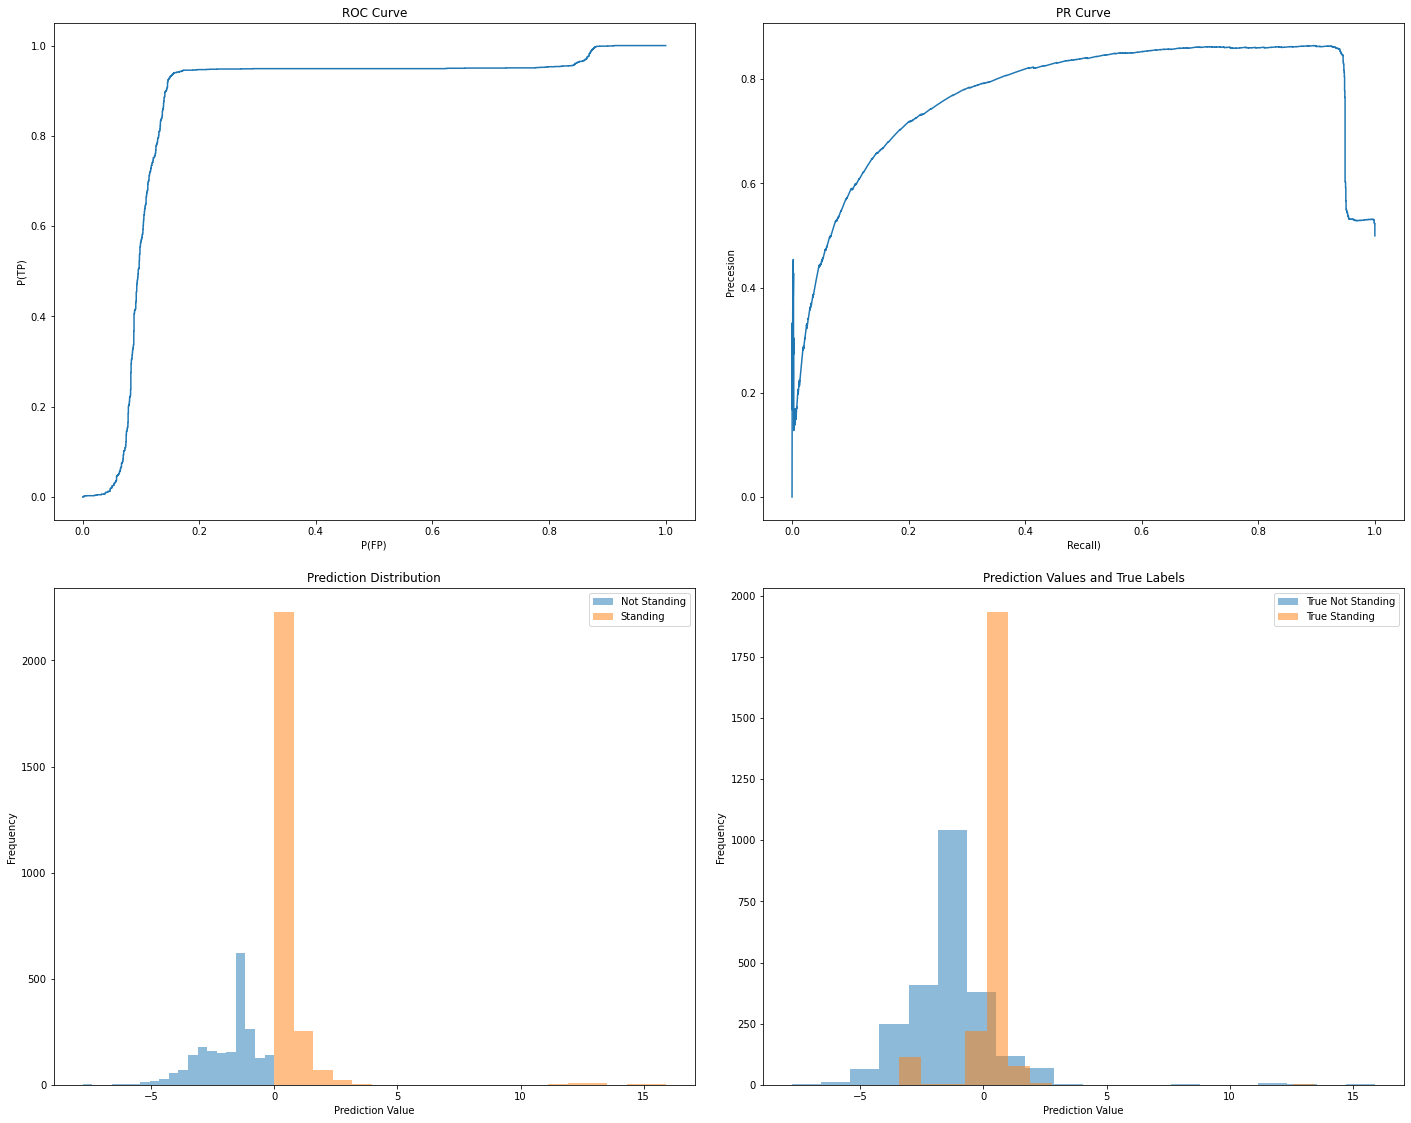

In [23]:
fpr, tpr, recs, pres = roc_pr(test_Y_probs,test_data_T.reshape(1,-1)[0])

graph(recs, pres, fpr, tpr, test_Y_probs, test_Y_sign, test_data_T)

### QDA Plots

A note on the QDA plots is that the histograms of the predicted class probabilities are quite different from the other algorithms. With my data, it appears that all predicted values for the negative class (not standing) are extremely small compared to probabilities of the positive class. This skews the graph to only appear to show a sliver of where the negative class probabilities lie. Due to this, an additional plot is included to show the distribution of only the negative class probabilities based on the predicted negative class. On this graph, it is seen that the bins calculated are on the scale of 1e-5 due to the numbers being extremely small.

#### QDA Training Data - Time / Confusion Matrix

In [24]:
start_time = time.time()
qda = QDA()
qda.train(train_data_Xs,train_data_T.reshape(1,-1)[0])

qda_train_time = time.time() - start_time

train_Y_disc, train_Y_sign, d1, d2 = qda.use(train_data_Xs)

print("Time: ", qda_train_time)
confusion_matrix(train_Y_sign,train_data_T.reshape(1,-1)[0].tolist())

Time:  0.007997274398803711


,Actual -1,Actual 1
Predicted -1,8937,294
Predicted 1,537,9180


#### QDA Test Data - Confusion Matrix

In [25]:
test_Y_probs, test_Y_sign, d1, d2 = qda.use(test_data_Xs)

confusion_matrix(test_Y_sign,test_data_T.reshape(1,-1)[0].tolist())

,Actual -1,Actual 1
Predicted -1,2252,66
Predicted 1,117,2302


#### Evaluated Models' Metrics

In [26]:
train_metrics = calc_metrics(train_Y_sign, train_data_T)
test_metrics = calc_metrics(test_Y_sign, test_data_T)

metrics_df_append1 = pd.DataFrame(data=np.array(list(train_metrics.values())).reshape(1,-1), index=["QDA Train"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df_append2 = pd.DataFrame(data=np.array(list(test_metrics.values())).reshape(1,-1), index=["QDA Test"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df = pd.concat([metrics_df, metrics_df_append1, metrics_df_append2], axis=0, sort=False)
metrics_df

,Precision,Recall,Specificity,F1,MCC
Pocket Train,0.855158,0.935402,0.841566,0.893482,0.780412
Pocket Test,0.856483,0.940034,0.842550,0.896316,0.786316
QDA Train,0.944736,0.968968,0.943319,0.956698,0.912586
QDA Test,0.951633,0.972128,0.950612,0.961771,0.922950


#### QDA Model Test Data -  Metrics Graphs

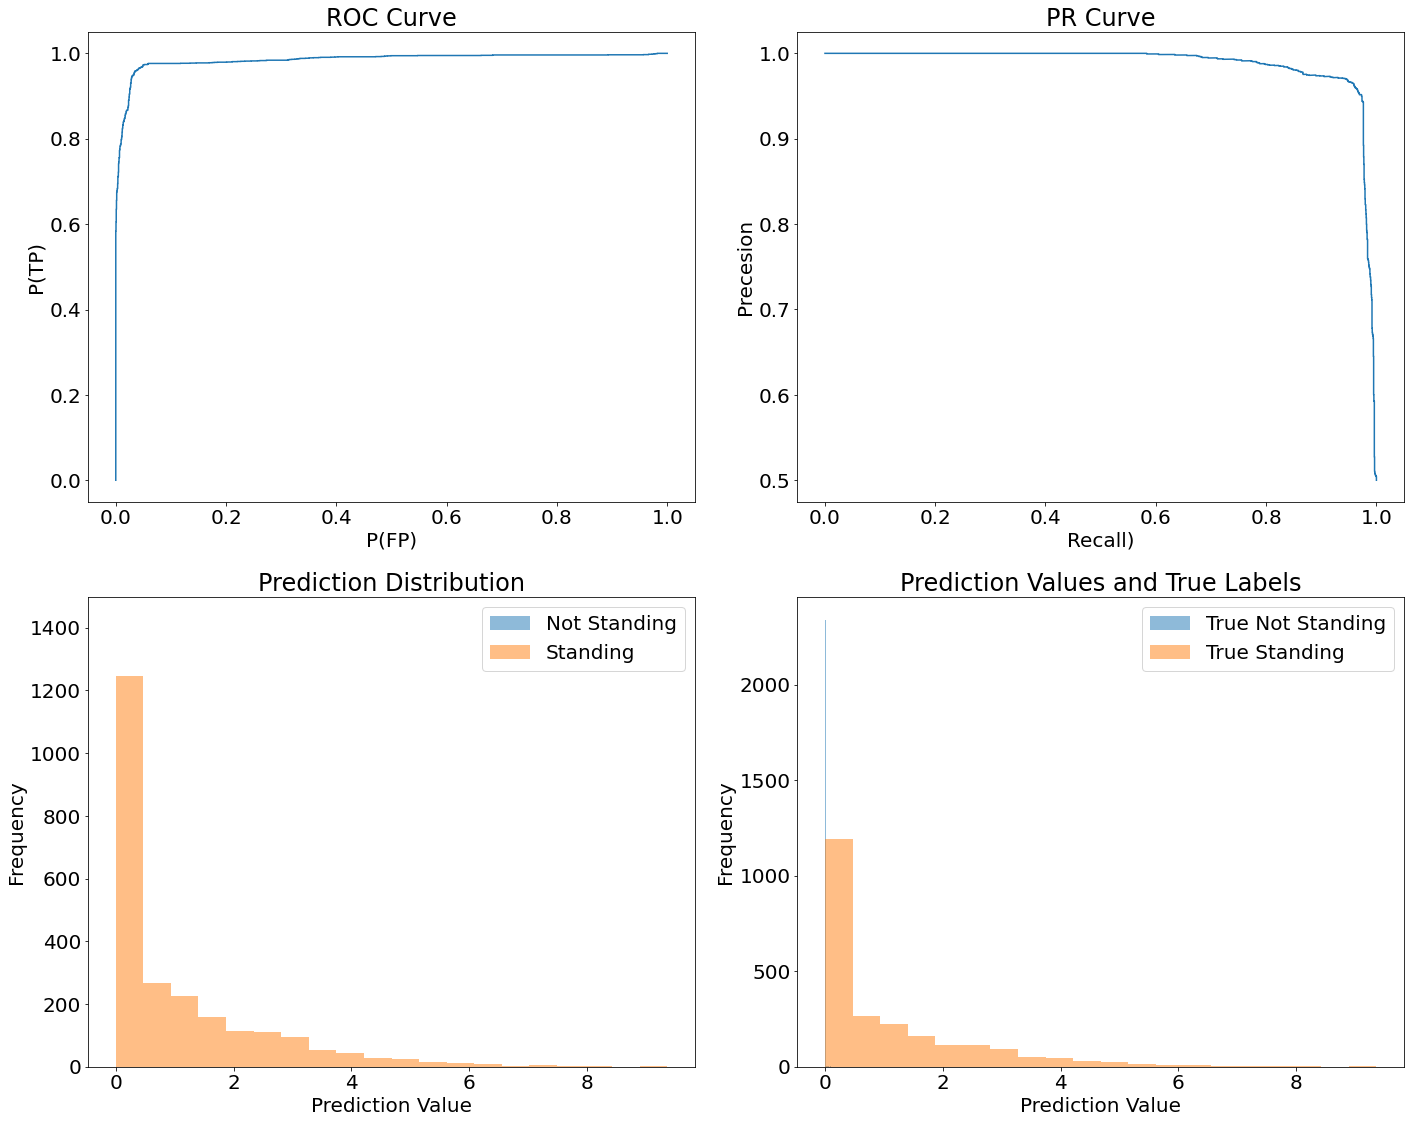

In [27]:
test_Y = []

for i, row in enumerate(test_Y_sign):
    if row == -1:
        test_Y.append(test_Y_probs[i, 0] * -1)
    else:
        test_Y.append(test_Y_probs[i, 1])
        
test_Y = np.array(test_Y)

fpr, tpr, recs, pres = roc_pr(test_Y,test_data_T.reshape(1,-1)[0])

graph(recs, pres, fpr, tpr, test_Y, test_Y_sign, test_data_T)

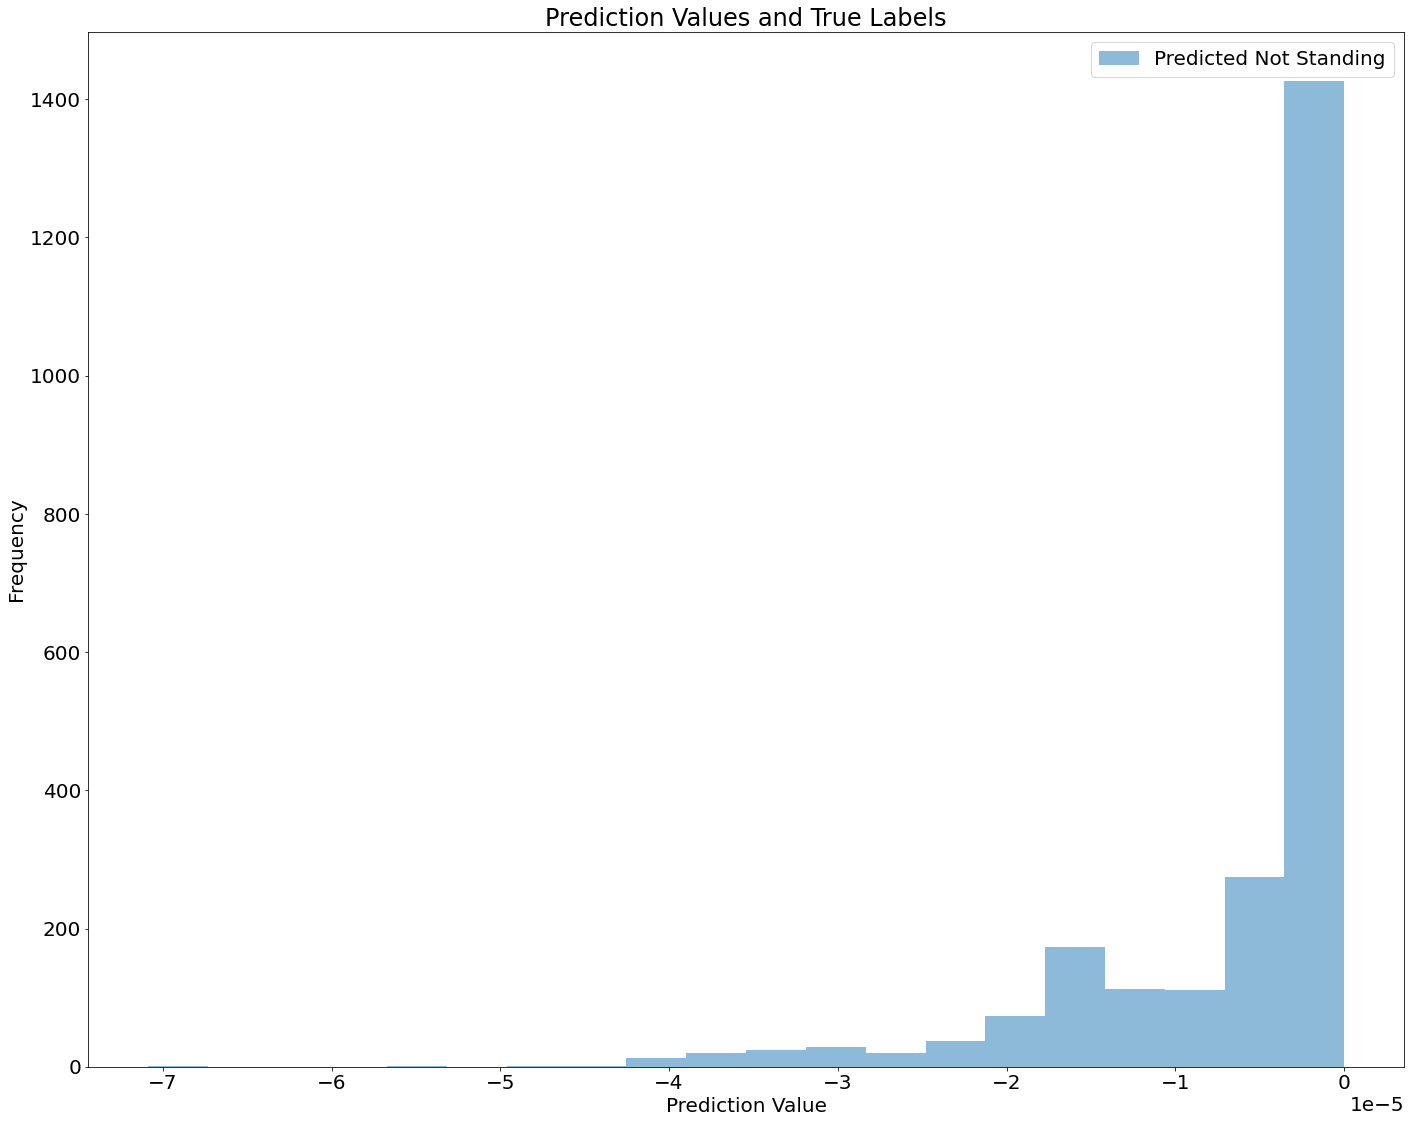

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(16)
fig.set_figwidth(20)
    
#Visualization using histogram to display groupings predictions
ax.hist(test_Y[test_Y_sign==(-1)], alpha=0.50, label="Predicted Not Standing",bins=20)
ax.set_xlabel('Prediction Value')
ax.set_ylabel('Frequency')
ax.legend()
ax.set_title("Prediction Values and True Labels")

plt.rcParams.update({'font.size': 20})
    
fig.tight_layout()

### LDA Plots
#### LDA Training Data - Time / Confusion Matrix

In [29]:
lda = LDA()
lda.train(train_data_Xs,train_data_T.reshape(1,-1)[0])
train_Y_probs, train_Y_sign, d1, d2 = lda.use(train_data_Xs)

confusion_matrix(train_Y_sign,train_data_T.reshape(1,-1)[0].tolist())

,Actual -1,Actual 1
Predicted -1,7232,607
Predicted 1,2242,8867


#### LDA Test Data - Confusion Matrix

In [30]:
test_Y_probs, test_Y_sign, d1, d2 = lda.use(test_data_Xs)
confusion_matrix(test_Y_sign,test_data_T.reshape(1,-1)[0].tolist())

,Actual -1,Actual 1
Predicted -1,1831,153
Predicted 1,538,2215


#### Evaluated Models' Metrics

In [31]:
train_metrics = calc_metrics(train_Y_sign, train_data_T)
test_metrics = calc_metrics(test_Y_sign, test_data_T)

metrics_df_append1 = pd.DataFrame(data=np.array(list(train_metrics.values())).reshape(1,-1), index=["LDA Train"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df_append2 = pd.DataFrame(data=np.array(list(test_metrics.values())).reshape(1,-1), index=["LDA Test"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df = pd.concat([metrics_df, metrics_df_append1, metrics_df_append2], axis=0, sort=False)
metrics_df

,Precision,Recall,Specificity,F1,MCC
Pocket Train,0.855158,0.935402,0.841566,0.893482,0.780412
Pocket Test,0.856483,0.940034,0.842550,0.896316,0.786316
QDA Train,0.944736,0.968968,0.943319,0.956698,0.912586
QDA Test,0.951633,0.972128,0.950612,0.961771,0.922950
LDA Train,0.798182,0.935930,0.763352,0.861585,0.709934
LDA Test,0.804577,0.935389,0.772900,0.865065,0.717810


#### LDA Model Test Data -  Metrics Graphs

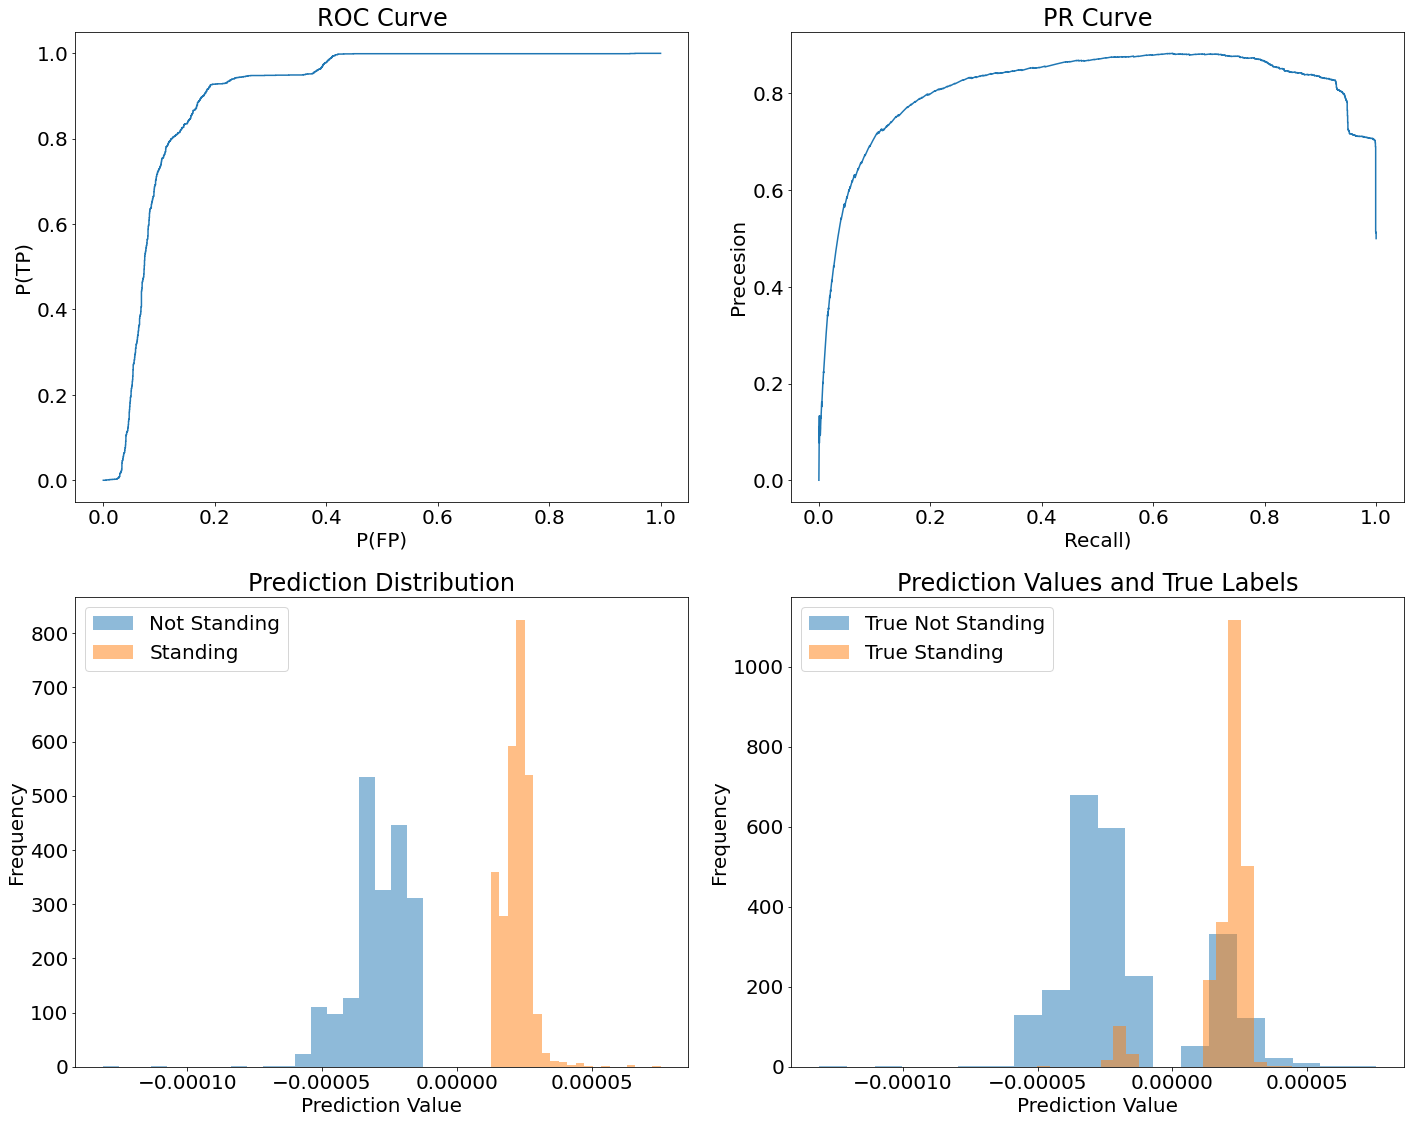

In [32]:
test_Y = []

for i, row in enumerate(test_Y_sign):
    if row == -1:
        test_Y.append(test_Y_probs[i, 0] * -1)
    else:
        test_Y.append(test_Y_probs[i, 1])
        
test_Y = np.array(test_Y)
        
fpr, tpr, recs, pres = roc_pr(test_Y, test_data_T.reshape(1,-1)[0])

graph(recs, pres, fpr, tpr, test_Y, test_Y_sign, test_data_T)

### Logistic Regression Plots
#### Logistic Regression - Training Data Time / Confusion Matrix

In [33]:
lr = LogisticRegression()
lr.train(train_data_Xs,train_data_T.reshape(1,-1)[0])
train_Y_probs, train_Y_sign = lr.use(train_data_Xs)

confusion_matrix(train_Y_sign,train_data_T.reshape(1,-1)[0].tolist())

,Actual -1,Actual 1
Predicted -1,7593,1639
Predicted 1,1881,7835


#### Logistic Regression Test Data - Confusion Matric

In [34]:
test_Y_probs, test_Y_sign = lr.use(test_data_Xs)

confusion_matrix(test_Y_sign,test_data_T.reshape(1,-1)[0].tolist())

,Actual -1,Actual 1
Predicted -1,1899,418
Predicted 1,470,1950


#### Evaluated Models' Metrics

In [35]:
train_metrics = calc_metrics(train_Y_sign, train_data_T)
test_metrics = calc_metrics(test_Y_sign, test_data_T)

metrics_df_append1 = pd.DataFrame(data=np.array(list(train_metrics.values())).reshape(1,-1), index=["Logistic Regression Train"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df_append2 = pd.DataFrame(data=np.array(list(test_metrics.values())).reshape(1,-1), index=["Logistic Regression Test"], columns=['Precision', 'Recall', 'Specificity', 'F1', 'MCC'])
metrics_df = pd.concat([metrics_df, metrics_df_append1, metrics_df_append2], axis=0, sort=False)
metrics_df

,Precision,Recall,Specificity,F1,MCC
Pocket Train,0.855158,0.935402,0.841566,0.893482,0.780412
Pocket Test,0.856483,0.940034,0.842550,0.896316,0.786316
QDA Train,0.944736,0.968968,0.943319,0.956698,0.912586
QDA Test,0.951633,0.972128,0.950612,0.961771,0.922950
LDA Train,0.798182,0.935930,0.763352,0.861585,0.709934
LDA Test,0.804577,0.935389,0.772900,0.865065,0.717810
Logistic Regression Train,0.806402,0.827000,0.801457,0.816571,0.628662
Logistic Regression Test,0.805785,0.823480,0.801604,0.814536,0.625232


#### Logistic Regression Model Test Data -  Metrics Graphs

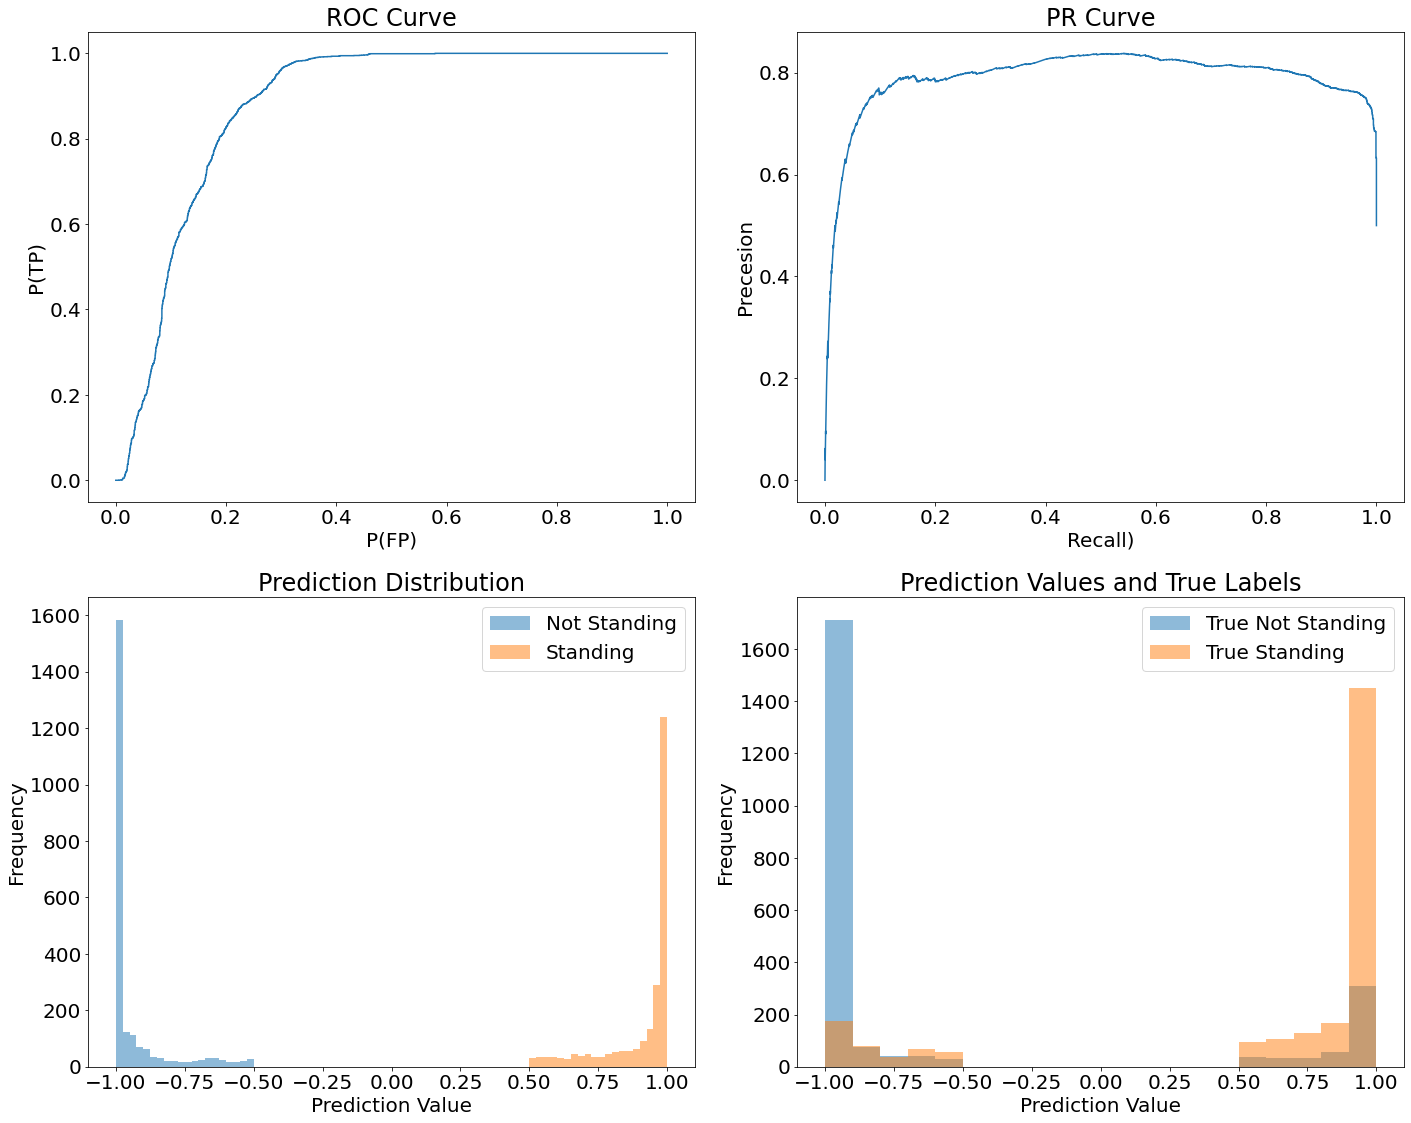

In [36]:
#toy_Y_sign[toy_Y_sign==-1] = 0
test_Y = []

for i, row in enumerate(test_Y_sign):
    if row == -1:
        test_Y.append(test_Y_probs[i, 0] * -1) #Need negative because probability is to -1 class
    else:
        test_Y.append(test_Y_probs[i, 1])
    
test_Y = np.array(test_Y)

fpr, tpr, recs, pres = roc_pr(test_Y,test_data_T.reshape(1,-1)[0])

graph(recs, pres, fpr, tpr, test_Y, test_Y_sign, test_data_T)

## Discussion of accuracies

Below is a list of the evaluation metrics used in a dataframe and bar graph to be able to visibly compare them. By far, QDA appears to perform best on all metrics in comparison to the other algorithms. In comparison of QDA's testing and training data, it is interesting that the model actually did slightly better on the test data compared to the performance on the train data. 

In comparing the evaluation metrics of the training and testing sets F1 scores, the testing sets mostly perform equally or slightly better than the training sets. Only the logistic regression model performed slightly worse on the testing set compared to the training set. This is a good sign that the models are well trained to generalize to other unseen datapoints, and it indicates a good potential of the models to be used to classify new data. 

In reviewing the precision, recall, and specificity, the values follow a similar pattern to the F1 scores with the QDA model performing best and similar performance for models between training and testing data. The MCC value is the most stark difference between the algorithms though. While it follows the same path as the other measurements of performning similarly on the training and testing data, the QDA has a much greater performance in comparison to the other model's MCC scores.

In [37]:
metrics_df   

,Precision,Recall,Specificity,F1,MCC
Pocket Train,0.855158,0.935402,0.841566,0.893482,0.780412
Pocket Test,0.856483,0.940034,0.842550,0.896316,0.786316
QDA Train,0.944736,0.968968,0.943319,0.956698,0.912586
QDA Test,0.951633,0.972128,0.950612,0.961771,0.922950
LDA Train,0.798182,0.935930,0.763352,0.861585,0.709934
LDA Test,0.804577,0.935389,0.772900,0.865065,0.717810
Logistic Regression Train,0.806402,0.827000,0.801457,0.816571,0.628662
Logistic Regression Test,0.805785,0.823480,0.801604,0.814536,0.625232


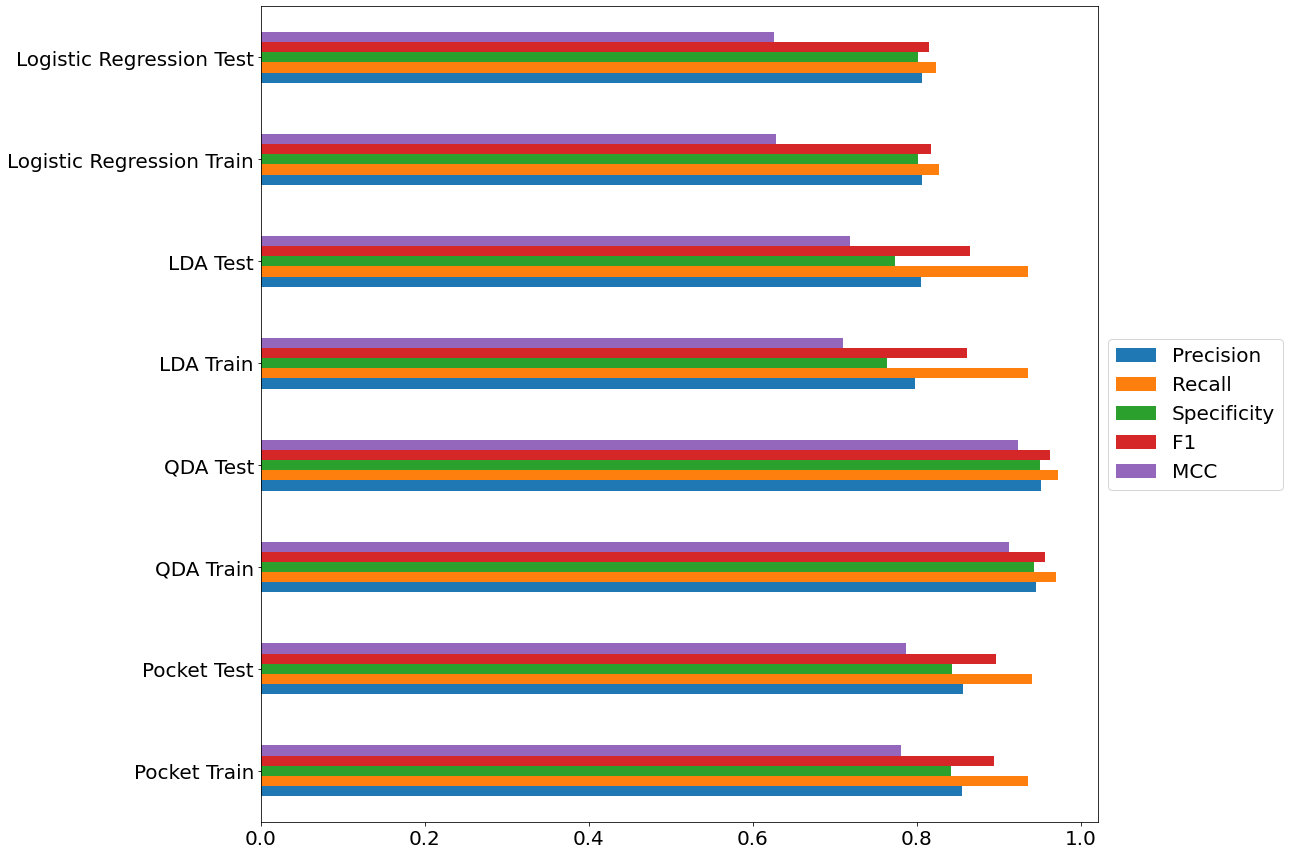

In [38]:
metrics_df.plot(kind = "barh", figsize=[15,15])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Discussions about classificaion model comparison

As previously discussed above, all of the models performed well to the test data, which indicates that the models are likely to generalize well to future data as well. 

In comparing the pocket algorithm, QDA algorithm, LDA algorithm, and logistic regression algorithm to train and test models, it was found that the QDA model performed significantly better than other models. The QDA model returned an F1 score of 0.961 on the test data, while the next best model, the pocket algorithm, only achieved an F1 score of 0.894. This is even more significant when it is considered that the the pocket algorithm took >80 seconds on average to train with only a maxiter of 10 and QDA takes less than 1 second to train due to the usage of the closed-form solution. 

With QDA and the pocket algorithms as my main considerations, the main thought of comparing the two models would be in how they may be applied in practice. The pocket algorithm may be updated much easier with new datapoints compared to QDA, especially if the model is planned to be use with live data. Due to this, I do believe there is a caveat that the pocket algorithm should be considered somewhat competitively in that application. In other cases, such as cases where the model does not need training updates as often or the datasets are not overtly large, I'd consider QDA to be superior.

In comparing the plots, my main concerns lie in the PR curves and the histograms that showed the predicted class probabilities versus the true target labels. In the PR curves, only the QDA model gave an expected model. The other models gave slightly abnormal findings in the PR curves, though they are within the realm of reasonability. I am not as significantly concerned with the PR curves though as the training and testing data is balanced for the positive and negative class, and I do not have a specific focus on false positives. In the histograms that showed the predicted class probabilities versus the true target labels, the LDA and logistic regression models showed a distribution of probabilities for values that were incorrectly classified that were well separated. More perculiar though was that the pocket algorithm and QDA algorithm showed results that may show potential for improvement of the models. The pocket algorithm showed significant overlap over the common areas in the center of the probabilities. The QDA graph stood out as well because the negative predictions were extremely small and in an extremely small range compared to the positive predictions, which may indicate that there is potential to adjust the model to balance our the range of potential predictions for the negative and positive class.

# Conclusions

In my review of the wearables data, my goal was to be able to predict a binary classification of whether the individual was standing or not standing based on the acclerometer readings recorded. In comparing the 4 models, the QDA model was superior in binary classification. It had a significantly higher score in all evaluation metrics, and performed faster than other models. However, it is important to note that in cases of significantly large datasets or the usage of a model that had to be continuously updated, the pocket algorithm would be indicated as the strongest option.

# References

Ugulino, Wallace, et al. “Wearable Computing: Accelerometers’ Data Classification of Body Postures and Movements.” Advances in Artificial Intelligence - SBIA 2012, Springer Berlin Heidelberg, 2012, pp. 52–61, doi:10.1007/978-3-642-34459-6_6.